In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast
import os
from datasets import load_dataset
from utils import find_num_parts

# Fetch from huf

In [12]:
hf_dataset = load_dataset("Howard881010/climate-1day-finetuned")

num_key_name = 'temp'
window_size = 1
df_valid = pd.DataFrame(hf_dataset['valid'])
df_valid['input_times'] = df_valid['input_num'].apply(lambda x: x[0][0])
df_test = pd.DataFrame(hf_dataset['test'])
df_test['input_times'] = df_test['input_num'].apply(lambda x: x[0][0])
df_test['output_times'] = df_test['output_num'].apply(lambda x: x[0][0])
df_test['pred_times'] = df_test['pred_output_case4'].apply(lambda x: find_num_parts(x, num_key_name, window_size)[0][0])


In [13]:
df = pd.read_csv("/home/ubuntu/multimodal/Predictions_and_attempts/results_climate_bge/1_1.csv")
df_nlinear = pd.read_csv("/home/ubuntu/multimodal/Predictions_and_attempts/climate/1_day/mixed/nlinear_output_test.csv")
df_nlinear_text = pd.read_csv("/home/ubuntu/multimodal/Predictions_and_attempts/climate/1_day/mixed/nlinear_text_output_test.csv")
df_nlinear['nlinear_times'] = df_nlinear['pred_num'].apply(ast.literal_eval).apply(lambda x: x[0][0])
df_nlinear_text['nlinear_text_times'] = df_nlinear_text['pred_num'].apply(ast.literal_eval).apply(lambda x: x[0][0])


df['pred_times'] = df['pred_times'].apply(
    lambda x: np.fromstring(x.strip('[]'), sep=' ').tolist()).apply(lambda x: x[0])

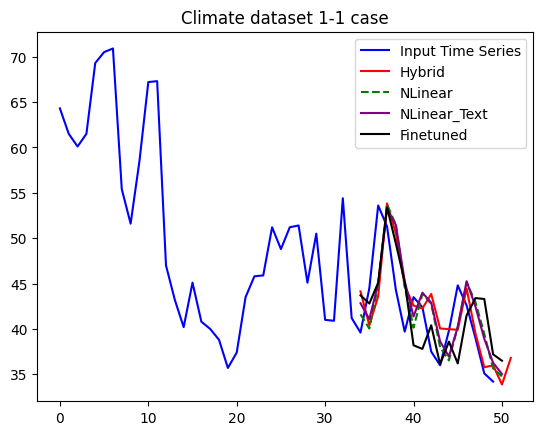

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_train, df_valid, and df_test are already defined

# Concatenate input_times columns from all three datasets
df_combined = pd.concat([df_valid[['input_times']], df_test[['input_times']]])

# Verifying length of df_valid

# Adjusting df, df_nlinear, and df_nlinear_text to match the output window (400 - length of df_valid)
df = df.iloc[:380 - len(df_valid)]  # Slice up to 400 minus the length of df_valid
df_nlinear = df_nlinear.iloc[1:(380 - len(df_valid))]
df_nlinear_text = df_nlinear_text.iloc[1:(380 - len(df_valid))]
df_test = df_test.iloc[1:(380 - len(df_valid))]

# Now filter df_combined to only include values between index 300 and 400
df_combined = df_combined.iloc[330:380]  # Only select the rows between index 300 and 400


# Plot the combined input_times as the blue line
plt.plot(df_combined['input_times'].reset_index(drop=True), color='blue', label='Input Time Series')

# Plot the output_times from df_test in its correct place on the x-axis
output_start_index = len(df_valid) - 330 + 2
plt.plot(range(output_start_index, output_start_index + len(df)), df['pred_times'], color='red', label='Hybrid')
plt.plot(range(output_start_index, output_start_index + len(df_nlinear)), df_nlinear['nlinear_times'], color='green', label='NLinear', linestyle='dashed')
plt.plot(range(output_start_index, output_start_index + len(df_nlinear_text)), df_nlinear_text['nlinear_text_times'], color='purple', label='NLinear_Text')
plt.plot(range(output_start_index, output_start_index + len(df_test)), df_test['pred_times'], color='black', label='Finetuned')
# Add a legend
plt.legend()

# Add a title
plt.title("Climate dataset 1-1 case")
plt.savefig('plot.pdf')

# Show the plot
plt.show()


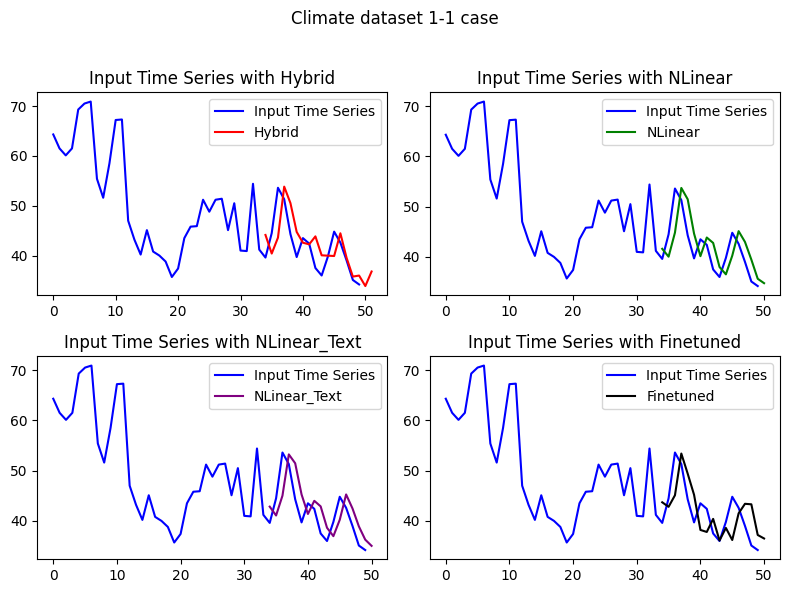

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_train, df_valid, df_test, df, df_nlinear, df_nlinear_text are already defined

# Concatenate input_times columns from all three datasets
df_combined = pd.concat([df_valid[['input_times']], df_test[['input_times']]])

# Verifying length of df_valid

# Adjusting df, df_nlinear, and df_nlinear_text to match the output window (380 - length of df_valid)
df = df.iloc[:380 - len(df_valid)]  # Slice up to 380 minus the length of df_valid
df_nlinear = df_nlinear.iloc[1:(380 - len(df_valid))]
df_nlinear_text = df_nlinear_text.iloc[1:(380 - len(df_valid))]
df_test = df_test.iloc[1:(380 - len(df_valid))]

# Now filter df_combined to only include values between index 300 and 380
df_combined = df_combined.iloc[330:380]  # Only select the rows between index 330 and 380

# Set up the figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot Input Time Series with Hybrid
axs[0, 0].plot(df_combined['input_times'].reset_index(drop=True), color='blue', label='Input Time Series')
output_start_index = len(df_valid) - 330 + 2
axs[0, 0].plot(range(output_start_index, output_start_index + len(df)), df['pred_times'], color='red', label='Hybrid')
axs[0, 0].set_title('Input Time Series with Hybrid')
axs[0, 0].legend()

# Plot Input Time Series with NLinear
axs[0, 1].plot(df_combined['input_times'].reset_index(drop=True), color='blue', label='Input Time Series')
axs[0, 1].plot(range(output_start_index, output_start_index + len(df_nlinear)), df_nlinear['nlinear_times'], color='green', label='NLinear')
axs[0, 1].set_title('Input Time Series with NLinear')
axs[0, 1].legend()

# Plot Input Time Series with NLinear_Text
axs[1, 0].plot(df_combined['input_times'].reset_index(drop=True), color='blue', label='Input Time Series')
axs[1, 0].plot(range(output_start_index, output_start_index + len(df_nlinear_text)), df_nlinear_text['nlinear_text_times'], color='purple', label='NLinear_Text')
axs[1, 0].set_title('Input Time Series with NLinear_Text')
axs[1, 0].legend()

# Plot Input Time Series with Finetuned
axs[1, 1].plot(df_combined['input_times'].reset_index(drop=True), color='blue', label='Input Time Series')
axs[1, 1].plot(range(output_start_index, output_start_index + len(df_test)), df_test['pred_times'], color='black', label='Finetuned')
axs[1, 1].set_title('Input Time Series with Finetuned')
axs[1, 1].legend()

# Add an overall title and adjust layout
plt.suptitle("Climate dataset 1-1 case")
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save and show the plot
plt.savefig('climate_subplots.pdf')
plt.show()


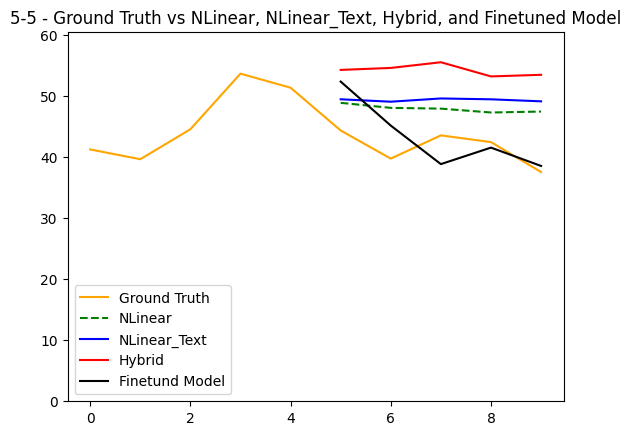

In [79]:
ground_truth = [41.2, 39.6, 44.5, 53.6, 51.300003, 44.3, 39.7, 43.5, 42.4, 37.5]
nlinear = [48.82511334643776, 48.00103736406997, 47.87728644499197, 47.24324006770493, 47.39981253696572]
nlinear_text = [49.40589632966641, 49.00891492579015, 49.54118647311808, 49.40140989137174, 49.07030886428115]
hybrid = [54.21157, 54.53475, 55.465683, 53.145485, 53.410316]

import matplotlib.pyplot as plt

# Data
ground_truth = [41.2, 39.6, 44.5, 53.6, 51.300003, 44.3, 39.7, 43.5, 42.4, 37.5]
nlinear = [48.82511334643776, 48.00103736406997, 47.87728644499197, 47.24324006770493, 47.39981253696572]
nlinear_text = [49.40589632966641, 49.00891492579015, 49.54118647311808, 49.40140989137174, 49.07030886428115]
hybrid = [54.21157, 54.53475, 55.465683, 53.145485, 53.410316]
input_copy = [41.2, 39.6, 44.5, 53.6, 51.300003]
finetund_model = [52.3, 45.1, 38.8, 41.5, 38.5]

# Plot ground truth
plt.plot(range(len(ground_truth)), ground_truth, color='orange', label='Ground Truth')

# Plot nlinear, nlinear_text, and hybrid after index 5
start_index = 5
plt.plot(range(start_index, start_index + len(nlinear)), nlinear, color='green', label='NLinear', linestyle='dashed')
plt.plot(range(start_index, start_index + len(nlinear_text)), nlinear_text, color='blue', label='NLinear_Text')
plt.plot(range(start_index, start_index + len(hybrid)), hybrid, color='red', label='Hybrid')
# plt.plot(range(start_index, start_index + len(input_copy)), input_copy, color='purple', label='Input Copy')
plt.plot(range(start_index, start_index + len(finetund_model)), finetund_model, color='black', label='Finetund Model')
plt.ylim(0, max(max(ground_truth), max(nlinear), max(nlinear_text), max(hybrid)) + 5)
# Add a legend
plt.legend()

# Add a title
plt.title("5-5 - Ground Truth vs NLinear, NLinear_Text, Hybrid, and Finetuned Model")
plt.savefig('plot.png')
# Show the plot
plt.show()




window size:  1


window size:  2
window size:  3
window size:  4


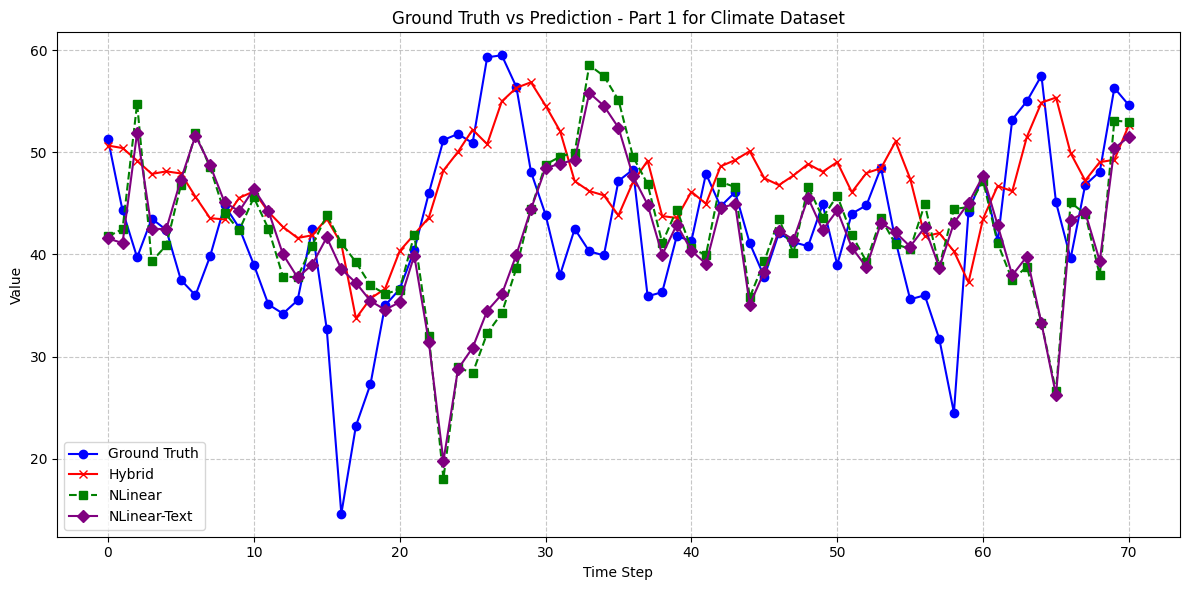

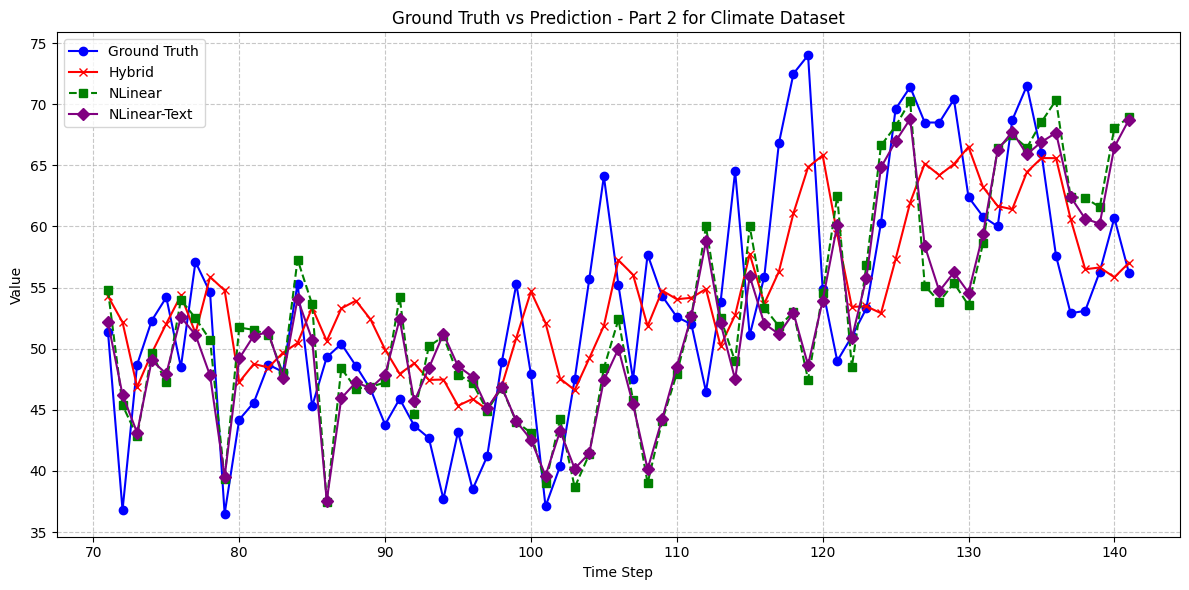

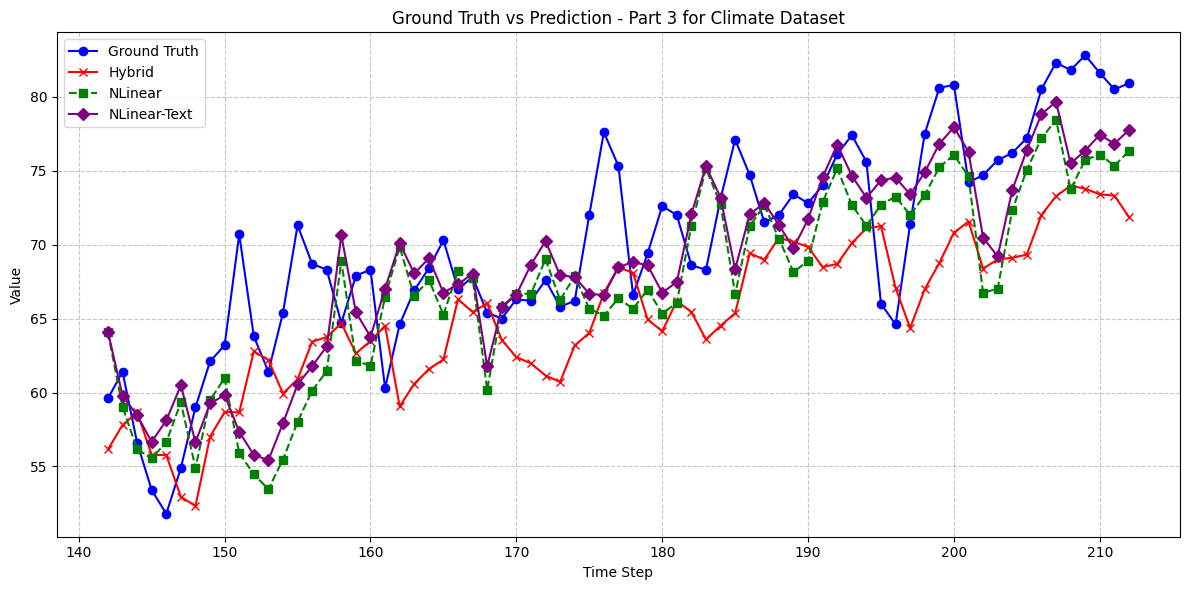

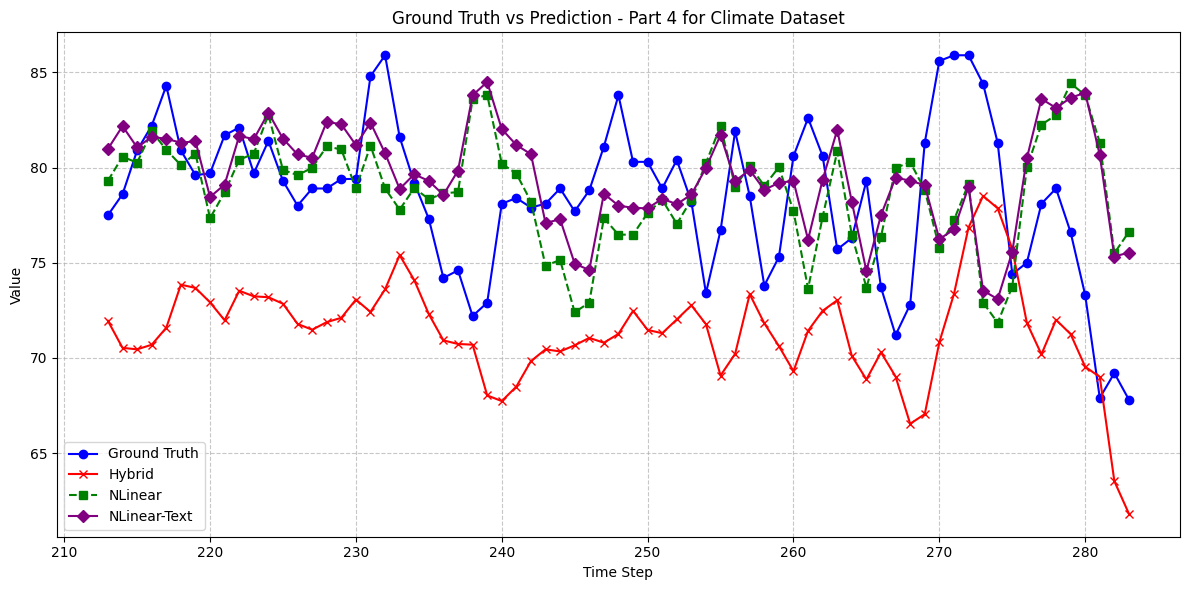

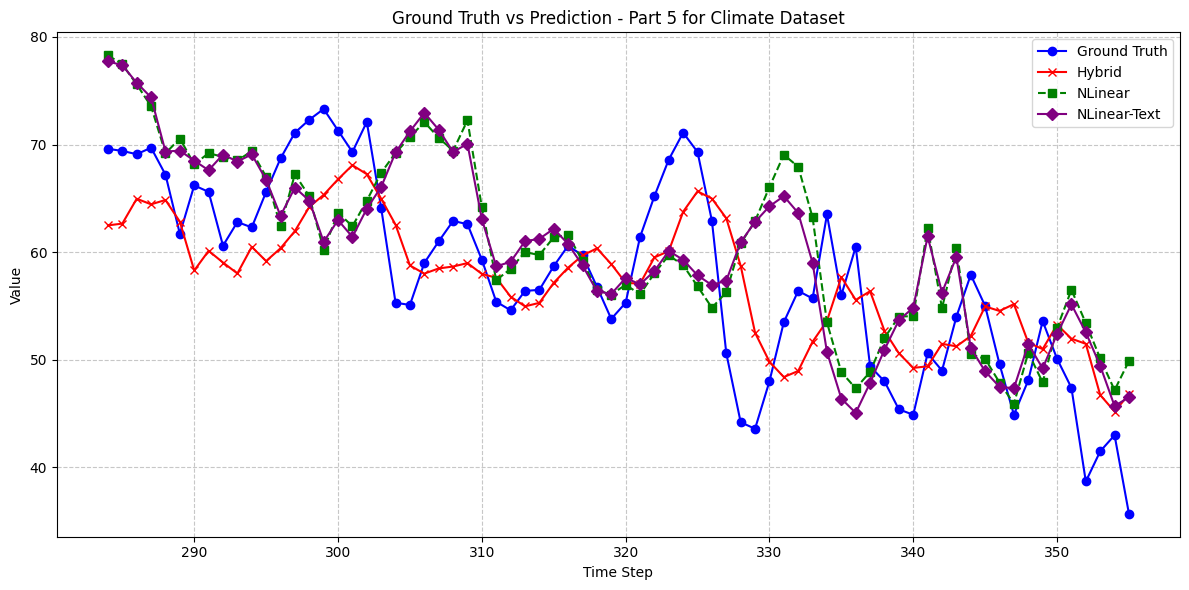

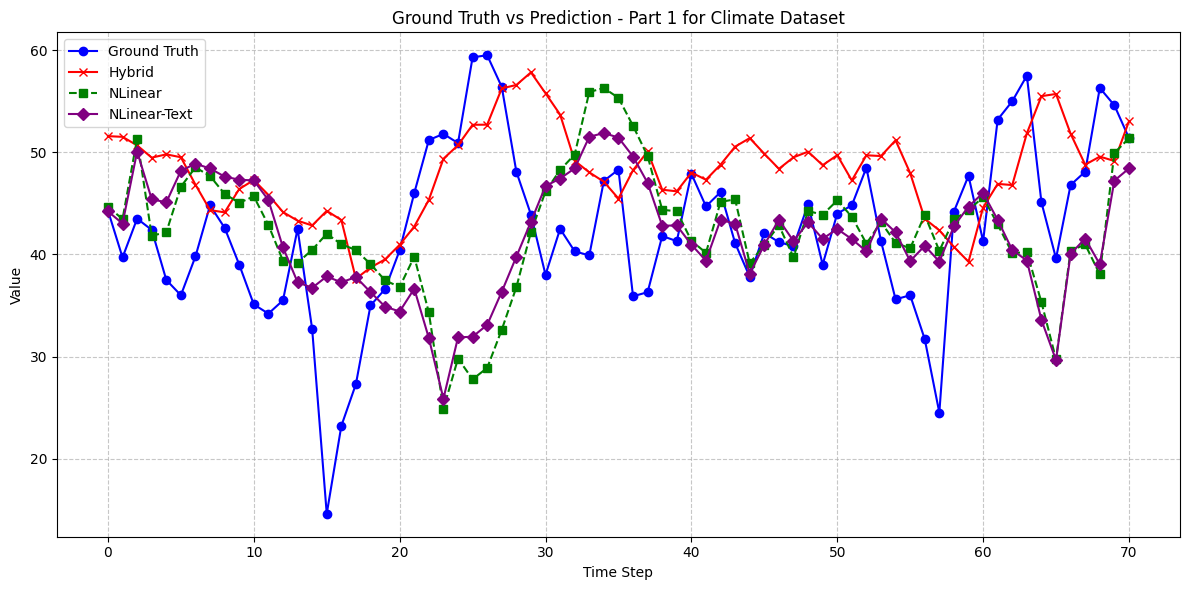

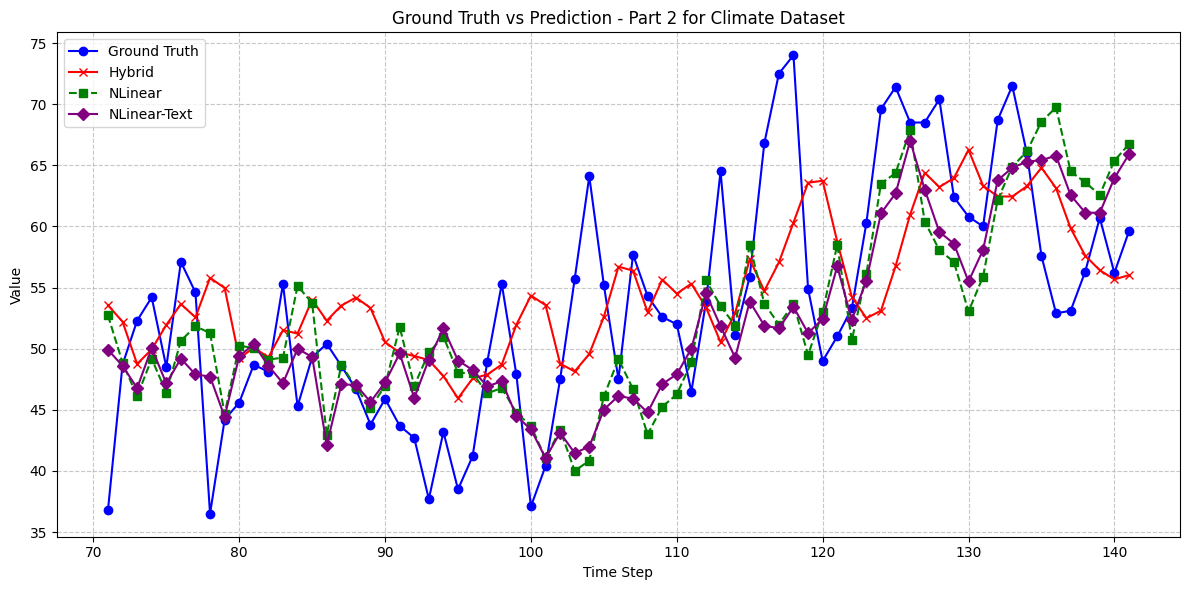

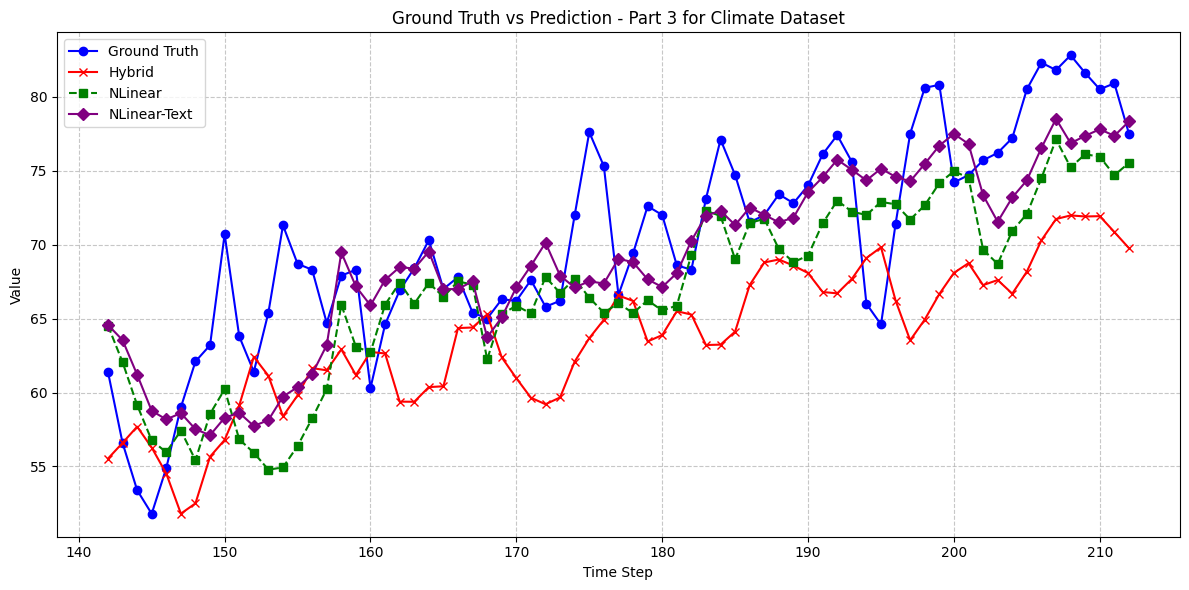

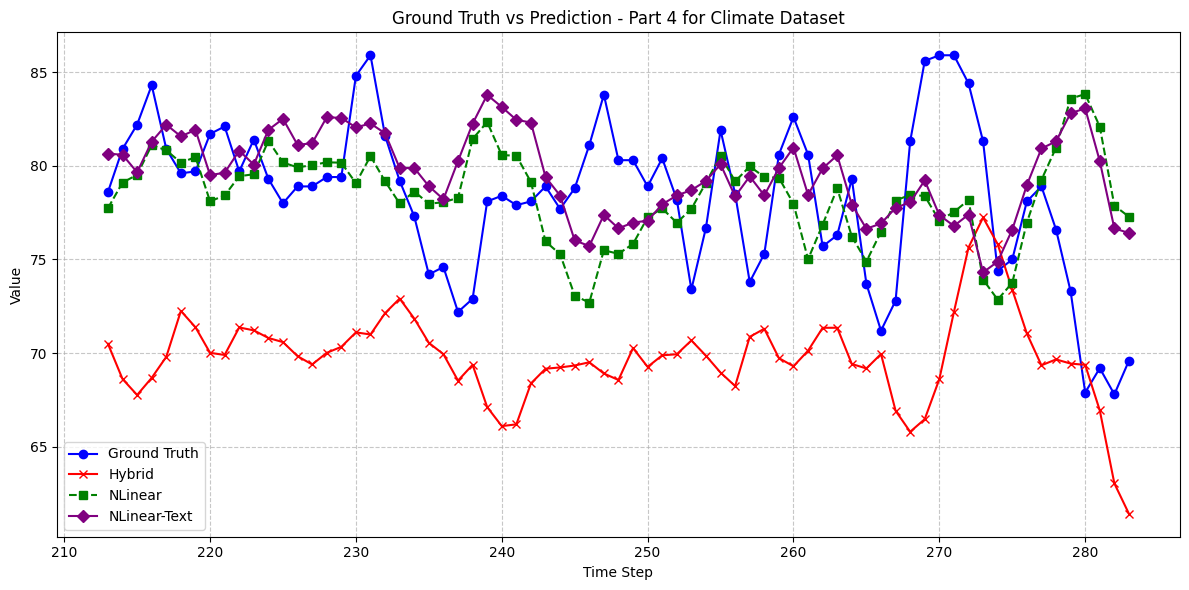

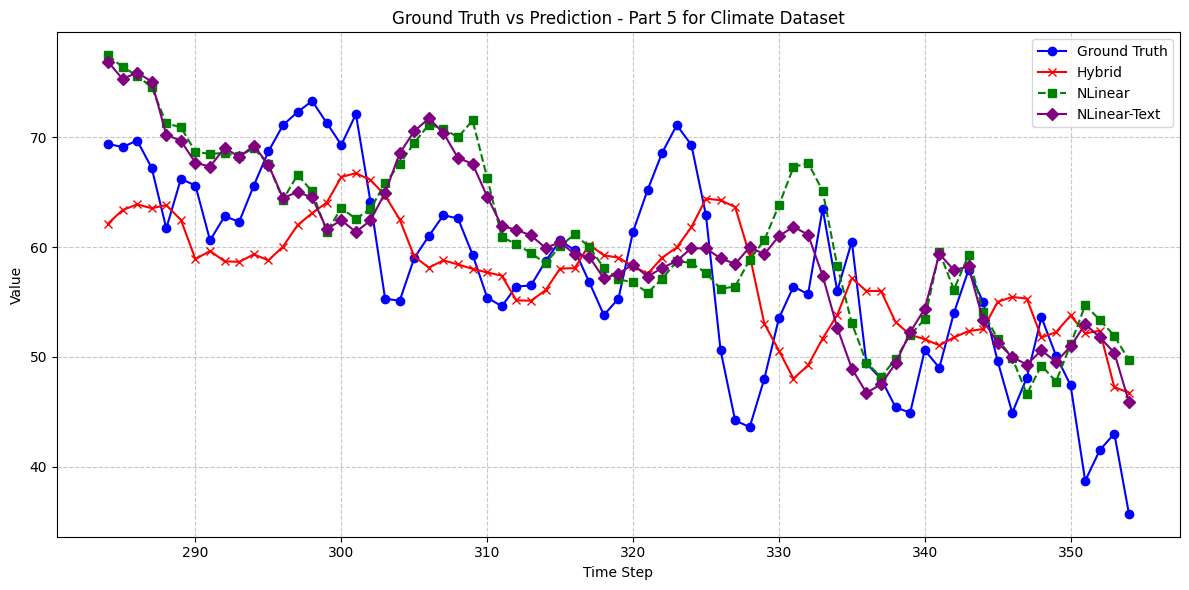

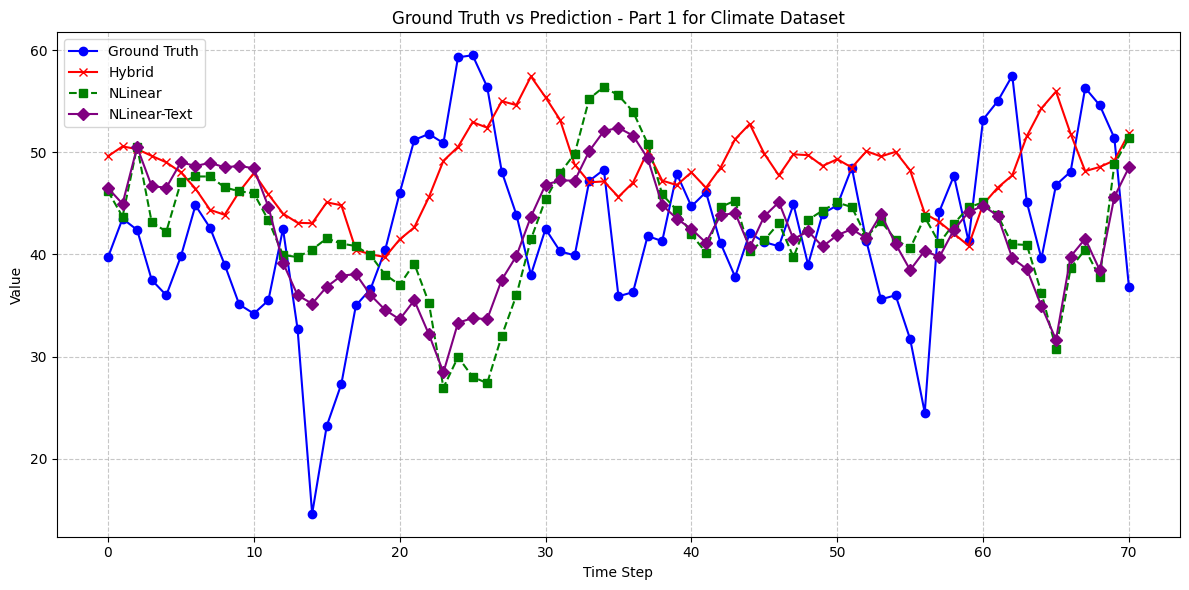

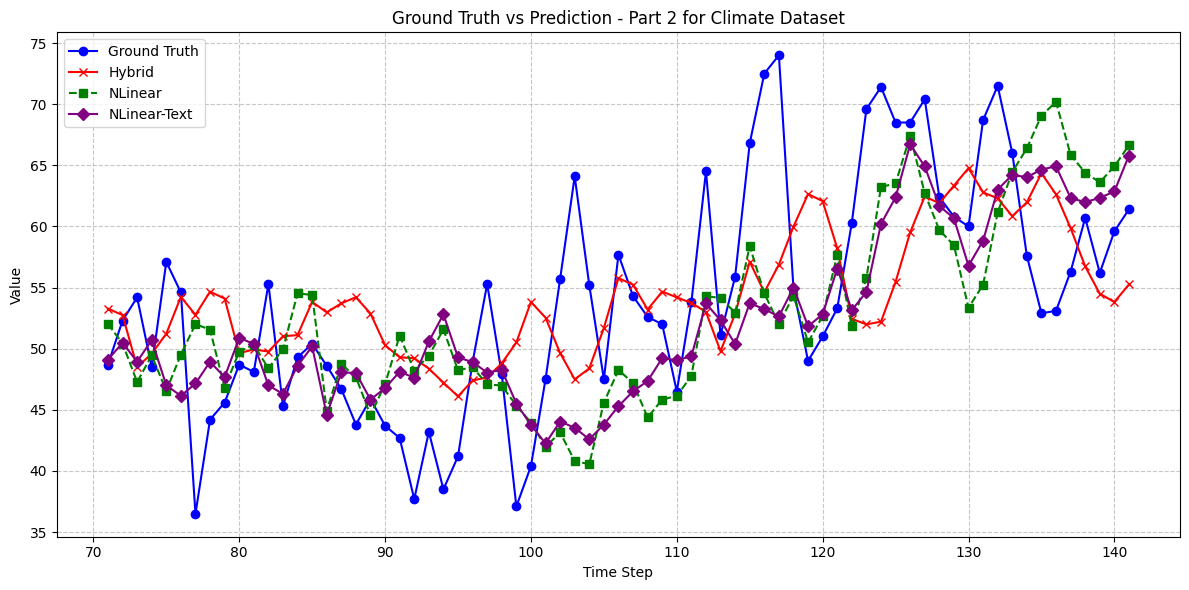

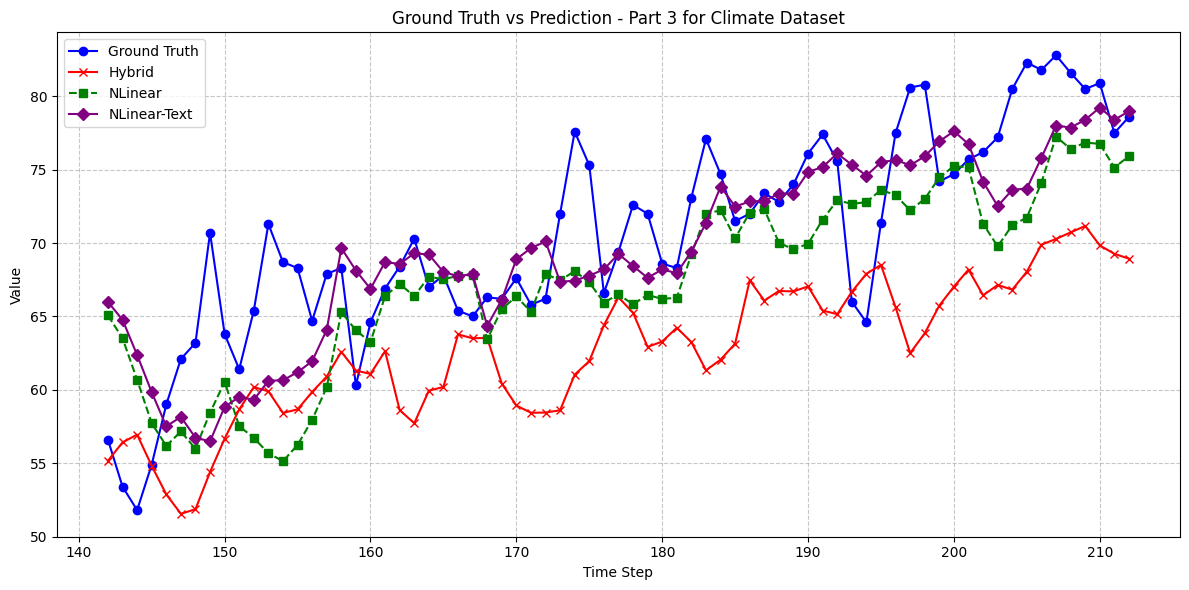

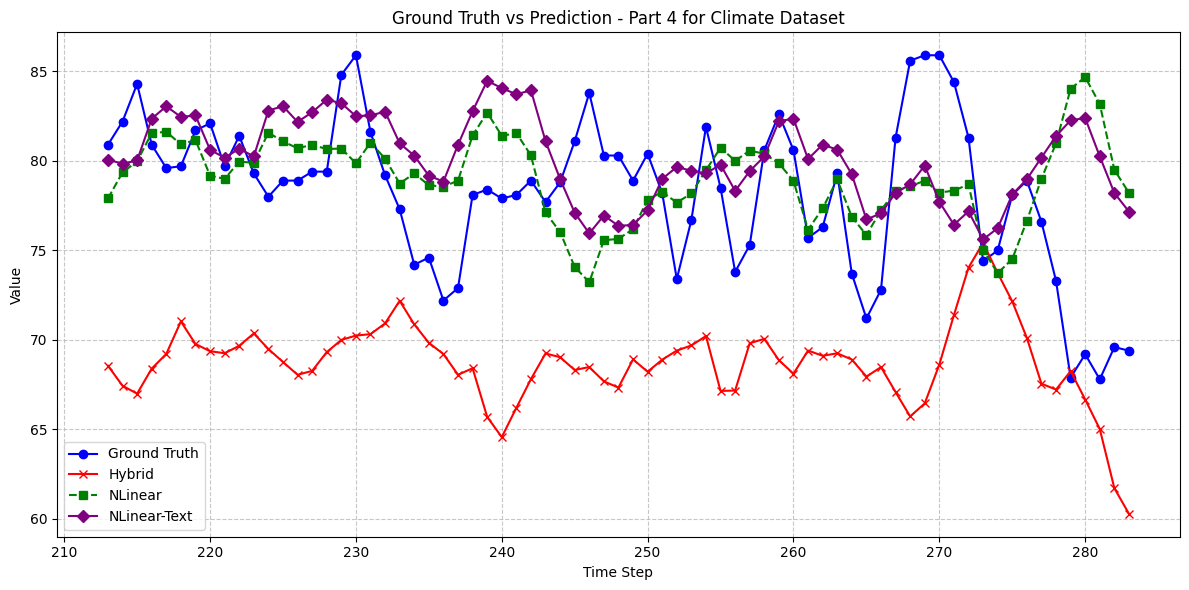

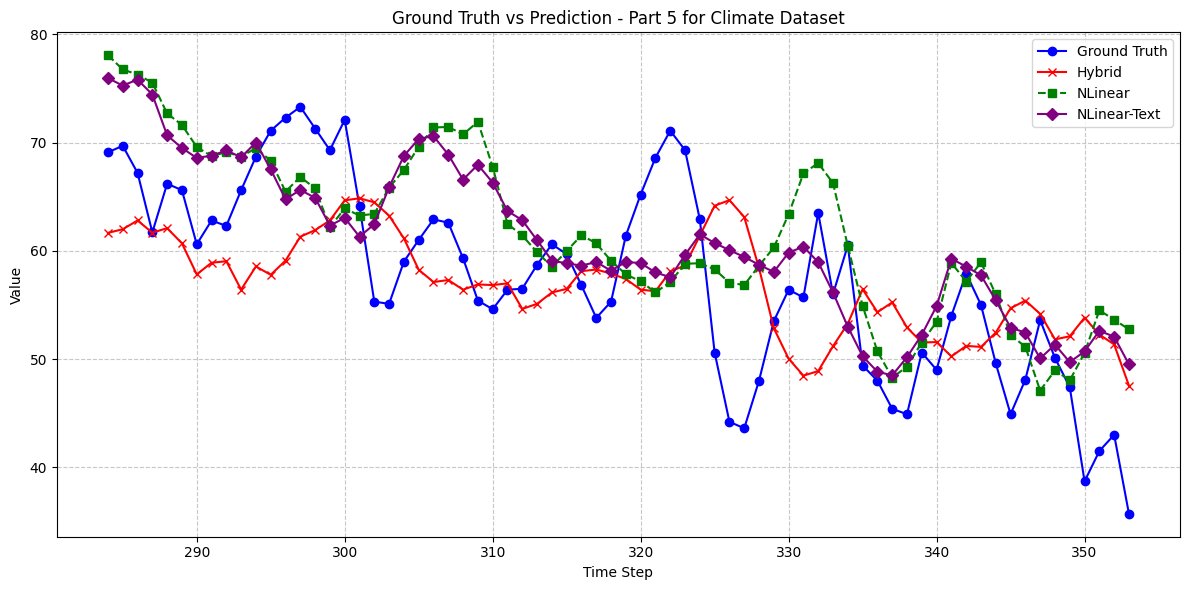

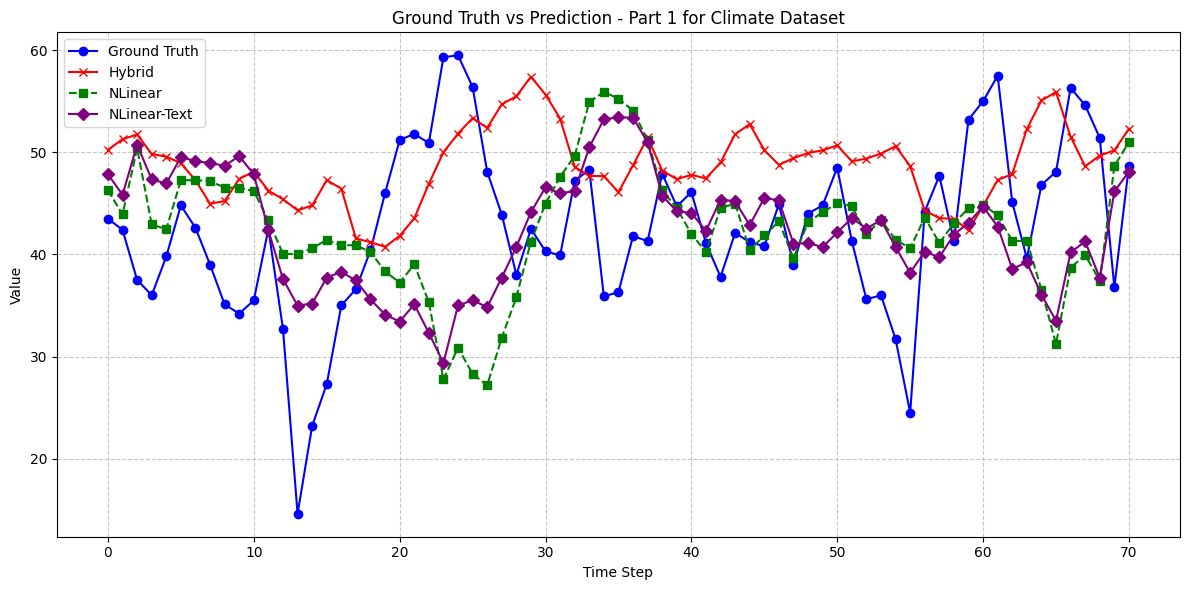

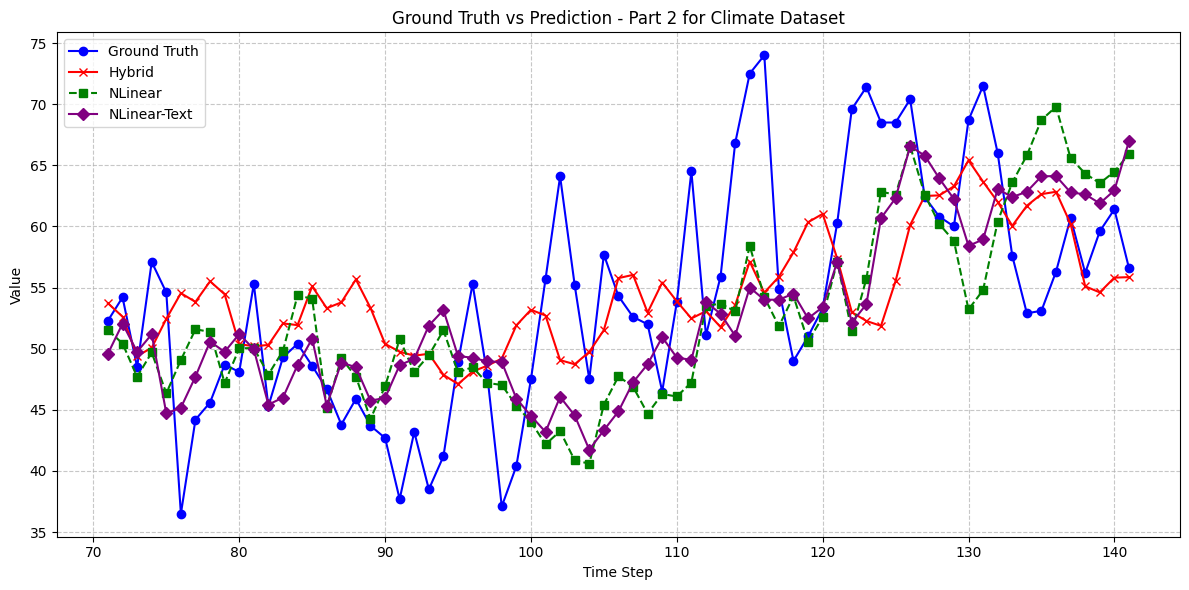

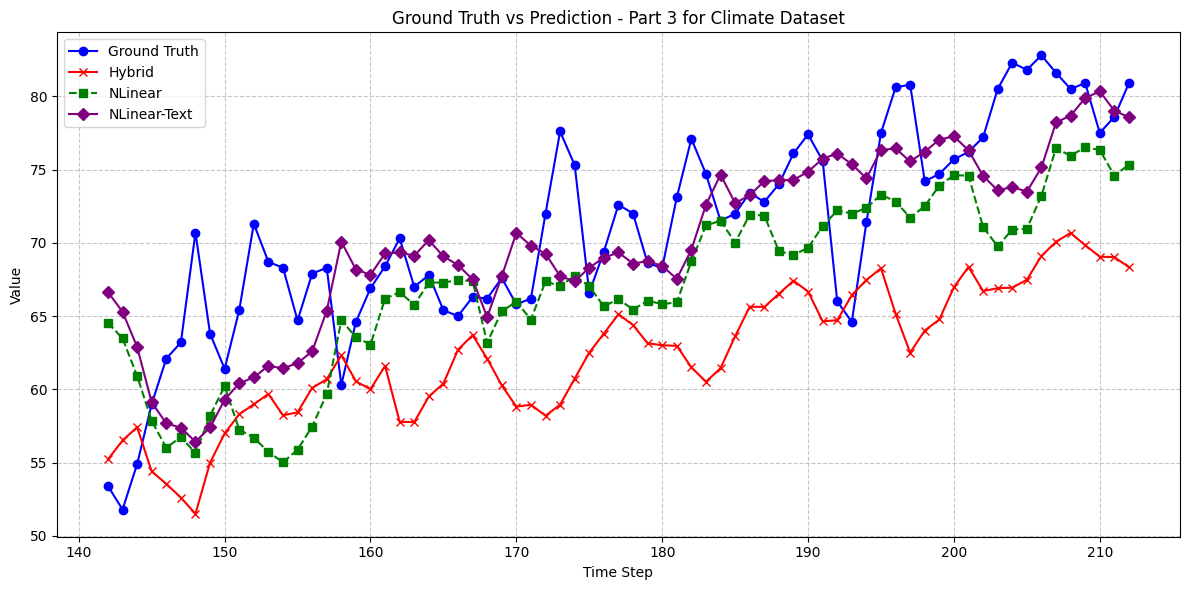

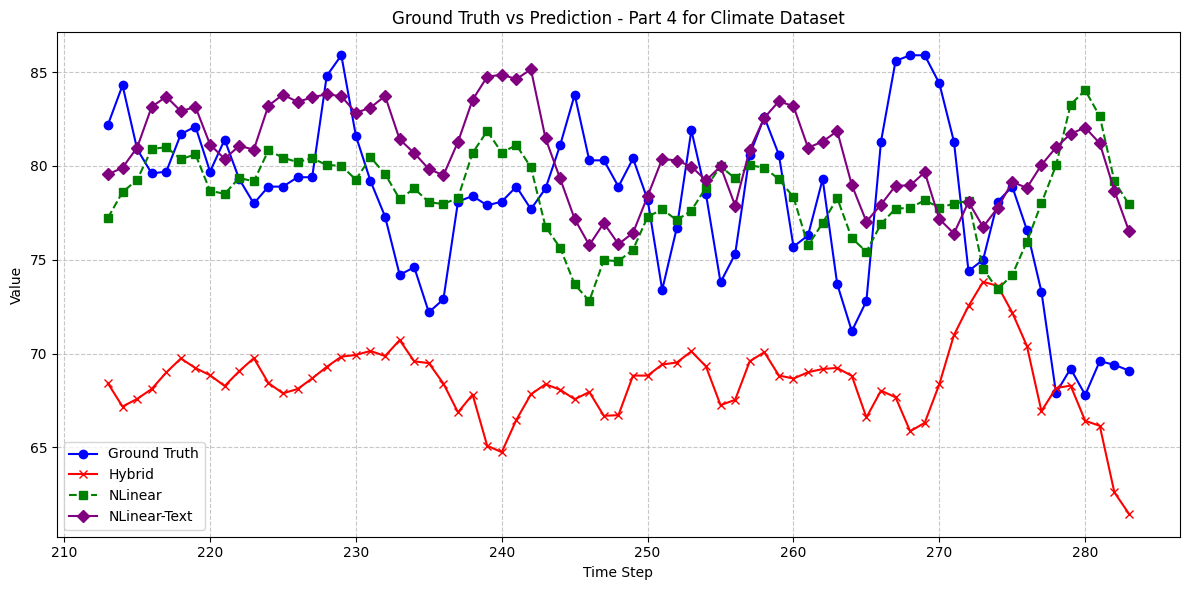

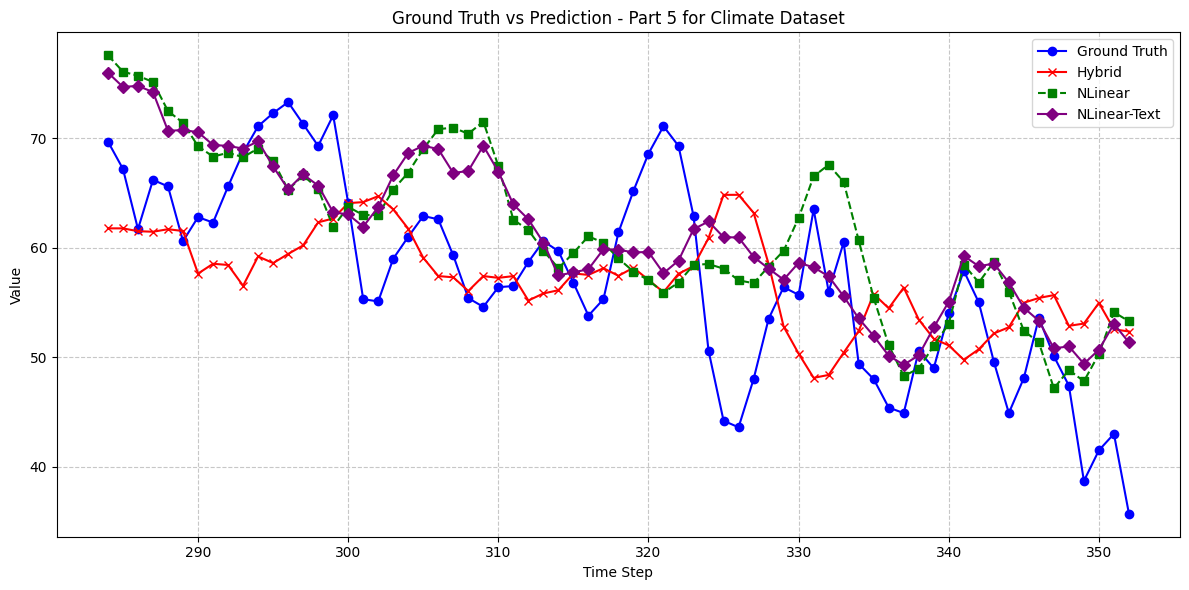

In [3]:
# Determine the length of the data and divide into 5 parts
index_length = len(df.index)
step = index_length // 5
window_sizes = 4


# Loop over each part to plot and save it as a separate figure
for window_size in range(1, window_sizes + 1):
	print("window size: ", window_size)
	output_dir = f"/home/ubuntu/multimodal/Plot/climate/{window_sizes}/day{window_size}"
	os.makedirs(output_dir, exist_ok=True)
	for i in range(5):
		start_idx = i * step
		end_idx = (i + 1) * step if i < 4 else index_length - (window_size -1)  # Ensure the last plot includes all remaining data

		# Create a new figure for each part
		fig, ax = plt.subplots(figsize=(12, 6))

		# Plot the data for each part
		ax.plot(df.index[start_idx:end_idx], df['output_times'].apply(lambda x: x[window_size - 1])[start_idx:end_idx], 
				color='blue', label='Ground Truth', marker='o')
		ax.plot(df.index[start_idx:end_idx], df['pred_times'].apply(lambda x: x[window_size - 1])[start_idx:end_idx], 
				color='red', label='Hybrid', marker='x')
		ax.plot(df_nlinear.index[start_idx:end_idx], df_nlinear['nlinear_times'].apply(lambda x: x[window_size - 1][0])[start_idx:end_idx], 
				color='green', label='NLinear', marker='s', linestyle='dashed')
		ax.plot(df_nlinear_text.index[start_idx:end_idx], df_nlinear_text['nlinear_text_times'].apply(lambda x: x[window_size - 1][0])[start_idx:end_idx], 
				color='purple', label='NLinear-Text', marker='D')

		# Customize the plot
		ax.set_title(f'Ground Truth vs Prediction - Part {i+1} for Climate Dataset')
		ax.set_xlabel('Time Step')
		ax.set_ylabel('Value')
		ax.legend()
		ax.grid(True, linestyle='--', alpha=0.7)

		# Save each plot as a separate image
		plt.tight_layout()
		plt.savefig(f"{output_dir}/part{i+1}.png")


In [4]:
a = [[ 361.73 ], [ 350.26 ], [ 341.76 ], [ 358.79 ] ]
print(a[0])

[361.73]
